In [26]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [27]:
# Lista de archivos excel de la Organización Internacional del café (https://www.ico.org/new_historical.asp)

url_list = ["https://www.ico.org/historical/1990%20onwards/Excel/1a%20-%20Total%20production.xlsx",
            "https://www.ico.org/historical/1990%20onwards/Excel/1b%20-%20Domestic%20consumption.xlsx",
            "https://www.ico.org/historical/1990%20onwards/Excel/2a%20-%20Exports%20-%20calendar%20year.xlsx",
            "https://www.ico.org/historical/1990%20onwards/Excel/2b%20-%20Imports.xlsx",
            "https://www.ico.org/historical/1990%20onwards/Excel/2c%20-%20Re-exports.xlsx",
            "https://www.ico.org/historical/1990%20onwards/Excel/4a%20-%20Inventories.xlsx",
            "https://www.ico.org/historical/1990%20onwards/Excel/4b%20-%20Disappearance.xlsx"]

In [28]:
# Creamos una función para guardar en una lista los archivos excel y convertirlos en un data frame 

df_list = []

def data_loading(url):
     for i in url:
        df = pd.read_excel(i, header=3)
        df_list.append(df)
        
data_loading(url_list)

# Pack each of excel data into dataframe

df_production = df_list[0]
df_domestic_consumption = df_list[1]
df_export = df_list[2]
df_import = df_list[3]
df_re_export = df_list[4]
df_inventorie = df_list[5]
df_import_consumption = df_list[6]

c:\Users\conod\miniconda3\envs\prueba_3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\conod\miniconda3\envs\prueba_3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## Limpiamos y organizamos el data frame de producción 

In [29]:
df_production.head(5)

,Crop year,Unnamed: 1,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,April group,NaN,40795.2926,42529.5454,46868.2042,40166.7591,39990.3663,29395.9601,44297.8201,39475.8391,...,71811.3709,64395.2131,75895.8810,74494.0133,69873.1443,71331.7881,75507.8515,70324.4647,81707.9885,76075.7437
2,Angola,(R/A),50.3450,79.3310,77.5200,32.6080,76.8020,62.1090,70.9250,64.3300,...,34.9700,28.7150,32.7900,34.9350,39.4050,40.5150,44.8300,35.0060,41.9027,51.8419
3,Bolivia (Plurinational State of),(A),122.7770,103.5360,120.2350,50.8230,116.9440,142.4850,124.5790,140.7190,...,117.2249,131.8354,105.2812,119.9122,99.8766,84.2191,77.9835,83.8112,82.5687,81.2654
4,Brazil,(A/R),27285.6286,27293.4934,34603.3542,28166.9786,28192.0470,18060.2022,29196.7430,26148.0040,...,55428.4102,48591.8289,55418.0012,54688.9664,53304.7669,52870.5876,56788.1784,52739.8179,65130.7997,58210.7127


In [30]:
# Renombramos las columnas para mejor entendimiento de los datos 
df_production = df_production.rename(columns={"Unnamed: 1" : "Varietales", "Crop year" : "País"})
df_production.head(2)

,País,Varietales,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,April group,NaN,40795.2926,42529.5454,46868.2042,40166.7591,39990.3663,29395.9601,44297.8201,39475.8391,...,71811.3709,64395.2131,75895.881,74494.0133,69873.1443,71331.7881,75507.8515,70324.4647,81707.9885,76075.7437


In [31]:
# Escribimos el nombre completo de los varietales 

df_production["Varietales"].replace({"(A)" : "Arabica", "(R)" : "Robusta", "(R/A)" : "Robusta/Arabica", "(A/R)" : "Arabica/Robusta", 0 : "Arabica"}, inplace=True)
df_production.head(5)

,País,Varietales,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,April group,NaN,40795.2926,42529.5454,46868.2042,40166.7591,39990.3663,29395.9601,44297.8201,39475.8391,...,71811.3709,64395.2131,75895.8810,74494.0133,69873.1443,71331.7881,75507.8515,70324.4647,81707.9885,76075.7437
2,Angola,Robusta/Arabica,50.3450,79.3310,77.5200,32.6080,76.8020,62.1090,70.9250,64.3300,...,34.9700,28.7150,32.7900,34.9350,39.4050,40.5150,44.8300,35.0060,41.9027,51.8419
3,Bolivia (Plurinational State of),Arabica,122.7770,103.5360,120.2350,50.8230,116.9440,142.4850,124.5790,140.7190,...,117.2249,131.8354,105.2812,119.9122,99.8766,84.2191,77.9835,83.8112,82.5687,81.2654
4,Brazil,Arabica/Robusta,27285.6286,27293.4934,34603.3542,28166.9786,28192.0470,18060.2022,29196.7430,26148.0040,...,55428.4102,48591.8289,55418.0012,54688.9664,53304.7669,52870.5876,56788.1784,52739.8179,65130.7997,58210.7127


In [32]:
# Eliminamos los valores nulos del data frame, adicionalmente, eliminamos los grupos según los totales por meses de cosecha Abril, Julio, Octubre y los totales del data frame 

df_production.dropna(how='all', inplace=True)
df_production['Varietales'].isna()
# df_production.drop(index=[1, 17, 26, 62, 63], axis=0, inplace=True)
df_production.head(2)

,País,Varietales,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20
1,April group,NaN,40795.2926,42529.5454,46868.2042,40166.7591,39990.3663,29395.9601,44297.8201,39475.8391,...,71811.3709,64395.2131,75895.881,74494.0133,69873.1443,71331.7881,75507.8515,70324.4647,81707.9885,76075.7437
2,Angola,Robusta/Arabica,50.3450,79.3310,77.5200,32.6080,76.8020,62.1090,70.9250,64.3300,...,34.9700,28.7150,32.790,34.9350,39.4050,40.5150,44.8300,35.0060,41.9027,51.8419


In [33]:
# Multiplicamos los datos por 60, ya que esta contabilizado la producción en sacos de 60kg
# df_production.iloc[:, 2:] = df_production.iloc[:, 2:].apply(lambda x: x * 60).round(2)
df_production.head()


,País,Varietales,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20
1,April group,NaN,40795.2926,42529.5454,46868.2042,40166.7591,39990.3663,29395.9601,44297.8201,39475.8391,...,71811.3709,64395.2131,75895.8810,74494.0133,69873.1443,71331.7881,75507.8515,70324.4647,81707.9885,76075.7437
2,Angola,Robusta/Arabica,50.3450,79.3310,77.5200,32.6080,76.8020,62.1090,70.9250,64.3300,...,34.9700,28.7150,32.7900,34.9350,39.4050,40.5150,44.8300,35.0060,41.9027,51.8419
3,Bolivia (Plurinational State of),Arabica,122.7770,103.5360,120.2350,50.8230,116.9440,142.4850,124.5790,140.7190,...,117.2249,131.8354,105.2812,119.9122,99.8766,84.2191,77.9835,83.8112,82.5687,81.2654
4,Brazil,Arabica/Robusta,27285.6286,27293.4934,34603.3542,28166.9786,28192.0470,18060.2022,29196.7430,26148.0040,...,55428.4102,48591.8289,55418.0012,54688.9664,53304.7669,52870.5876,56788.1784,52739.8179,65130.7997,58210.7127
5,Burundi,Arabica/Robusta,487.3930,667.1990,620.2380,393.3540,664.1430,433.9800,400.9690,249.7850,...,352.9776,204.1328,405.9615,163.2177,247.5500,269.4576,196.4128,202.1079,204.3391,272.4688


In [34]:
# Añadimos una columan para que sume el total de la producción por país desde 1990 hasta 2020

df_production['Total_produccion'] = df_production.iloc[:, 2:33].sum(axis=1)
df_production.head(2)

,País,Varietales,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_produccion
1,April group,NaN,40795.2926,42529.5454,46868.2042,40166.7591,39990.3663,29395.9601,44297.8201,39475.8391,...,64395.2131,75895.881,74494.0133,69873.1443,71331.7881,75507.8515,70324.4647,81707.9885,76075.7437,1.706333e+06
2,Angola,Robusta/Arabica,50.3450,79.3310,77.5200,32.6080,76.8020,62.1090,70.9250,64.3300,...,28.7150,32.790,34.9350,39.4050,40.5150,44.8300,35.0060,41.9027,51.8419,1.365783e+03


In [35]:
# Sumamos todas las columnas para obtener el total por año 
suma_total = df_production.iloc[:, 2:].sum()

df_suma = pd.DataFrame([suma_total], columns=df_production.columns[2:])

# Concatenar el DataFrame original con la fila de suma
df_con_suma = pd.concat([df_production, df_suma], axis=0, ignore_index=True)


In [36]:
# Renombramos los NaN
df_con_suma.iloc[-1, 0]='Produccion_anyo'

In [37]:
# Renombramos los NaN
df_con_suma.iloc[-1, 1]='Arabica+Robusta'

In [38]:
df_con_suma.head(2)

,País,Varietales,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_produccion
0,April group,NaN,40795.2926,42529.5454,46868.2042,40166.7591,39990.3663,29395.9601,44297.8201,39475.8391,...,64395.2131,75895.881,74494.0133,69873.1443,71331.7881,75507.8515,70324.4647,81707.9885,76075.7437,1.706333e+06
1,Angola,Robusta/Arabica,50.3450,79.3310,77.5200,32.6080,76.8020,62.1090,70.9250,64.3300,...,28.7150,32.790,34.9350,39.4050,40.5150,44.8300,35.0060,41.9027,51.8419,1.365783e+03


In [51]:
df_con_suma.describe()

,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,1999/00,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_produccion
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,...,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000,60.000000,60.000000,6.100000e+01
mean,9323.005960,10126.668440,9852.409420,9176.105310,9331.376930,8732.086910,10330.787610,9988.716110,10886.56062,13138.252840,...,14132.738770,15118.351210,15391.033980,15030.16726,15612.647450,16231.998010,16369.310270,17246.082030,16505.301570,3.700574e+05
std,38370.945362,41697.700707,40620.344323,37781.079013,38420.009464,35931.384001,42513.878819,41105.272169,44864.51407,54192.817146,...,58354.399528,62438.030053,63574.476740,62090.74262,64487.841898,67038.260987,67603.064414,71278.765356,68180.813173,1.539222e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.051000,0.007000,0.000000,0.000000e+00
25%,44.040750,78.574750,52.106250,43.352000,49.872750,50.720500,44.708750,49.594525,63.66225,59.015000,...,44.084525,34.633800,36.545625,41.94990,41.087400,36.724050,37.655525,40.427350,40.459525,1.366004e+03
50%,645.946000,687.133000,629.026500,527.320500,652.757500,722.524500,641.394000,623.792000,584.36050,452.235500,...,438.026050,388.490600,375.459050,370.08040,380.725100,316.727100,375.627100,379.610800,365.648250,1.484343e+04
75%,2082.472750,2228.721000,2200.189500,2363.685250,2415.050250,2649.783250,2653.612000,2726.666000,2257.63875,2860.311675,...,2441.022175,2638.176175,2745.668325,2144.06935,2290.826400,2825.297300,2915.145575,3161.008875,3063.181025,7.935741e+04
max,279690.178800,303800.053200,295572.282600,275283.159300,279941.307900,261962.607300,309923.628300,299661.483300,326596.81860,394147.585200,...,423982.163100,453550.536300,461731.019400,450905.01780,468379.423500,486959.940300,491079.308100,517382.460900,495159.047100,1.128675e+07


In [52]:
df_con_suma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   País              61 non-null     object 
 1   Varietales        56 non-null     object 
 2   1990/91           60 non-null     float64
 3   1991/92           60 non-null     float64
 4   1992/93           60 non-null     float64
 5   1993/94           60 non-null     float64
 6   1994/95           60 non-null     float64
 7   1995/96           60 non-null     float64
 8   1996/97           60 non-null     float64
 9   1997/98           60 non-null     float64
 10  1998/99           60 non-null     float64
 11  1999/00           60 non-null     float64
 12  2000/01           60 non-null     float64
 13  2001/02           60 non-null     float64
 14  2002/03           60 non-null     float64
 15  2003/04           60 non-null     float64
 16  2004/05           60 non-null     float64
 17 

In [39]:
df_con_suma.tail(4)

,País,Varietales,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_produccion
57,Yemen,Arabica,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,185.0677,187.5251,187.2981,178.3814,156.2460,143.4533,132.1281,85.5762,91.4278,3.182659e+03
58,Total,NaN,93230.0596,101266.6844,98524.0942,91761.0531,93313.7693,87320.8691,103307.8761,99887.1611,...,141327.3877,151183.5121,153910.3398,150301.6726,156126.4745,162319.9801,163693.1027,172460.8203,165053.0157,3.762251e+06
59,© International Coffee Organization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
60,Produccion_anyo,Arabica+Robusta,279690.1788,303800.0532,295572.2826,275283.1593,279941.3079,261962.6073,309923.6283,299661.4833,...,423982.1631,453550.5363,461731.0194,450905.0178,468379.4235,486959.9403,491079.3081,517382.4609,495159.0471,1.128675e+07


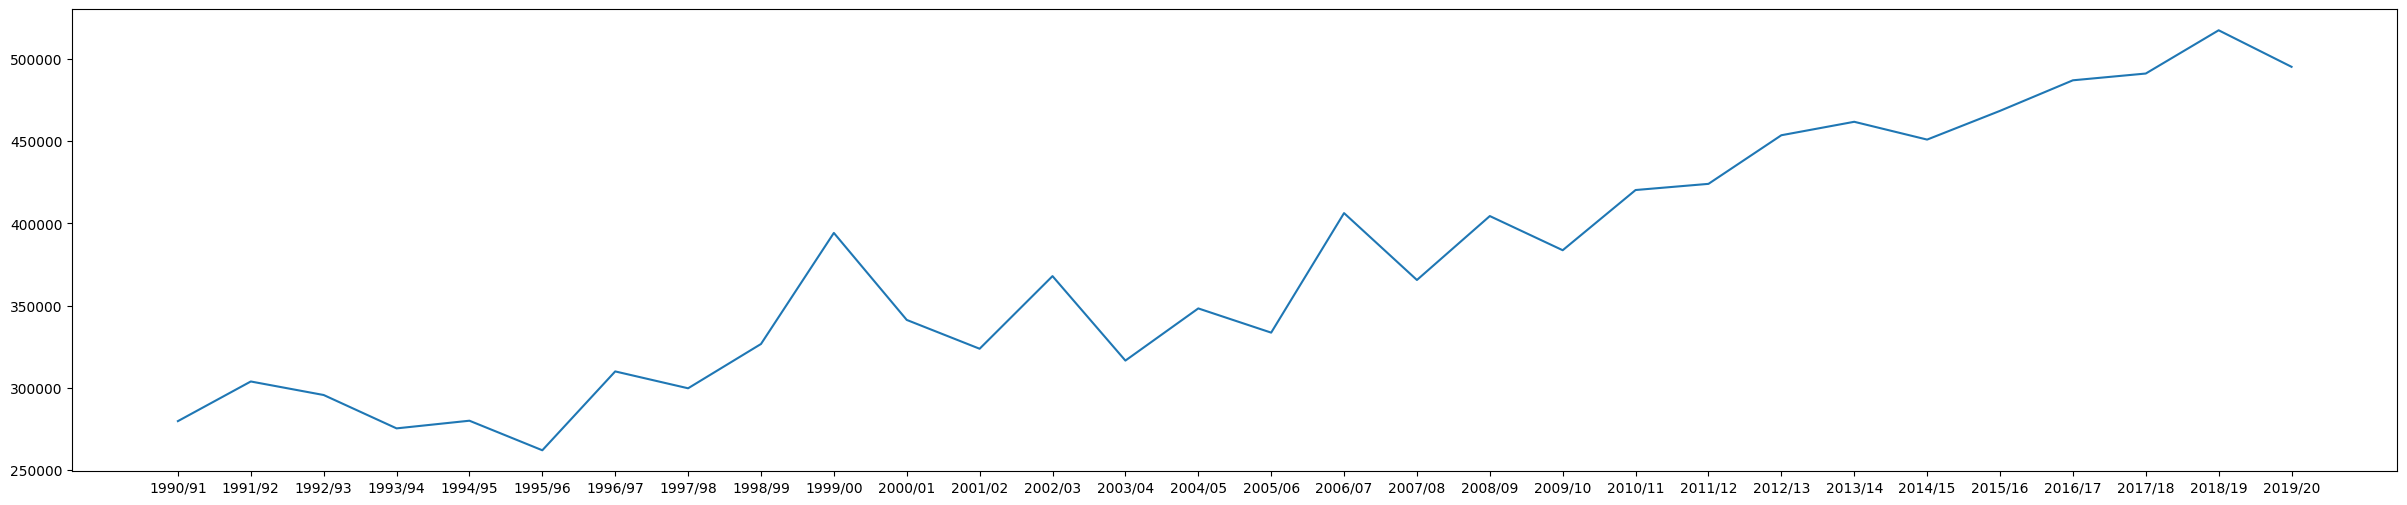

In [40]:

ultima_fila = df_con_suma.iloc[-1, 2:-1]
columnas = df_con_suma.columns[2:-1]
plt.figure(figsize=(30, 6))
plt.plot(columnas,ultima_fila)

plt.show()


In [41]:
# Creamos un nuevo excel para visualizar los gráficos en Tableau 
df_con_suma.to_excel('Produccion_final', engine='openpyxl', index=False)

## Carga del CSV de producción para realizar una prueba de modelo de Sarimax para confirmar que en 2050 el café esta en riesgo de desaparecer. 

In [42]:
modelo=pd.read_excel('./Produccion_final.xlsx')
modelo.head(2)

,País,Varietales,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_produccion
0,Angola,Robusta/Arabica,3020.70,4759.86,4651.2,1956.48,4608.12,3726.54,4255.50,3859.80,...,1722.90,1967.40,2096.10,2364.3,2430.90,2689.80,2100.36,2514.16,3110.51,81946.95
1,Bolivia (Plurinational State of),Arabica,7366.62,6212.16,7214.1,3049.38,7016.64,8549.10,7474.74,8443.14,...,7910.12,6316.87,7194.73,5992.6,5053.15,4679.01,5028.67,4954.12,4875.92,206970.18


In [43]:
# Obtener las columnas de años
columnas_años = modelo.columns[2:-1]  # Ignora la primera columna 'País' y la última columna 'Total_produccion'

# Crear un diccionario de mapeo para los nuevos nombres de las columnas
nuevos_nombres = {columna: columna.split('/')[0] for columna in columnas_años}

# Renombrar las columnas
modelo.rename(columns=nuevos_nombres, inplace=True)
modelo.head(2)


,País,Varietales,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_produccion
0,Angola,Robusta/Arabica,3020.70,4759.86,4651.2,1956.48,4608.12,3726.54,4255.50,3859.80,...,1722.90,1967.40,2096.10,2364.3,2430.90,2689.80,2100.36,2514.16,3110.51,81946.95
1,Bolivia (Plurinational State of),Arabica,7366.62,6212.16,7214.1,3049.38,7016.64,8549.10,7474.74,8443.14,...,7910.12,6316.87,7194.73,5992.6,5053.15,4679.01,5028.67,4954.12,4875.92,206970.18


In [44]:
modelo_2=modelo.drop(modelo.index[-1])
# Establecer la primera columna como índice y transponer el DataFrame
model_4 = modelo_2.set_index(modelo_2.columns[0]).T

# Reiniciar los nombres de las columnas
model_4.columns.name = None

In [45]:
model_4=model_4.drop(model_4.index[0])
model_4=model_4.drop(model_4.index[-1])

In [46]:
model_4 = model_4.astype(str)
model_4=model_4.apply(pd.to_numeric)
model_4.head(2)

,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,3020.70,7366.62,1637137.72,29243.58,90228.90,446482.98,58946.82,6277.68,57770.46,7837.62,...,12899.22,2566.98,5752.20,45421.02,9678.48,874.86,117300.54,67348.62,78617.28,0.0
1991,4759.86,6212.16,1637609.60,40031.94,127429.44,509591.76,55950.78,7457.16,44808.96,4779.18,...,11551.92,3262.74,4892.94,88136.16,25959.12,1067.52,125280.06,56442.24,86270.88,0.0


In [47]:
# Creamos las series temporales 
series=model_4[:]
series.head(2)

,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,3020.70,7366.62,1637137.72,29243.58,90228.90,446482.98,58946.82,6277.68,57770.46,7837.62,...,12899.22,2566.98,5752.20,45421.02,9678.48,874.86,117300.54,67348.62,78617.28,0.0
1991,4759.86,6212.16,1637609.60,40031.94,127429.44,509591.76,55950.78,7457.16,44808.96,4779.18,...,11551.92,3262.74,4892.94,88136.16,25959.12,1067.52,125280.06,56442.24,86270.88,0.0


In [48]:
# Extraer la columna de interés como variable endógena
columnas=series.columns
for columna in columnas:
    
    endog = series[columna]

In [49]:
# Definimos el modelo SARIMAX, aún no entendemo bien las variables de este modelo, preguntar en la tuto 

model = sm.tsa.SARIMAX(endog, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))

c:\Users\conod\miniconda3\envs\prueba_3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\conod\miniconda3\envs\prueba_3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [50]:
model_fit = model.fit()
predictions = model_fit.predict(start='2020-12-31', end='2050-12-31')
predictions.tail()

c:\Users\conod\miniconda3\envs\prueba_3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\conod\miniconda3\envs\prueba_3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2047-01-01    583.470211
2048-01-01    498.278481
2049-01-01    440.432188
2050-01-01    429.417123
2051-01-01     -3.386118
Freq: AS-JAN, Name: predicted_mean, dtype: float64

### Solo me realiza la predicción de la primera columna que corresponde a 'Anagola'.... me estoy volviendo loco 
* De locos 